## importing libraries

In [16]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## read data

In [17]:
df=pd.read_csv("Titanic.csv")

## extract info 

In [18]:
def data_info(data):

    """
    This function returns a DataFrame containing the summary information for each column 
    """

    Names=[col for col in data]
    data_types=[data[col].dtype for col in data.columns]
    top_10_unique_values=[data[col].value_counts().head(10).index.to_list() for col in data.columns]
    nunique_values=[data[col].nunique() for col in data.columns]
    nulls=[data[col].isnull().sum() for col in data.columns]
    percent_of_Nulls= [data[col].isnull().sum()/len(data)*100 for col in data.columns]
    duplicates=data.duplicated().sum()


    info_df=pd.DataFrame({'Name':Names,
                          'Data_Type':data_types,
                          'Top_10_Unique_Values':top_10_unique_values,
                          'Nunique_Values':nunique_values,
                          'Nulls':nulls,
                          'Percent_of_Nulls':percent_of_Nulls,
                          'Duplicates':duplicates})
    return info_df

In [19]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,PassengerId,int64,"[892, 1205, 1177, 1176, 1175, 1174, 1173, 1172...",418,0,0.000000,0
1,Survived,int64,"[0, 1]",2,0,0.000000,0
2,Pclass,int64,"[3, 1, 2]",3,0,0.000000,0
3,Name,object,"[Kelly, Mr. James, Carr, Miss. Jeannie, Dennis...",418,0,0.000000,0
4,Sex,object,"[male, female]",2,0,0.000000,0
5,Age,float64,"[21.0, 24.0, 22.0, 30.0, 18.0, 27.0, 26.0, 25....",79,86,20.574163,0
6,SibSp,int64,"[0, 1, 2, 3, 4, 8, 5]",7,0,0.000000,0
7,Parch,int64,"[0, 1, 2, 3, 4, 9, 6, 5]",8,0,0.000000,0
8,Ticket,object,"[PC 17608, CA. 2343, 113503, PC 17483, 220845,...",363,0,0.000000,0
9,Fare,float64,"[7.75, 26.0, 13.0, 8.05, 7.8958, 10.5, 7.775, ...",169,1,0.239234,0


## some visualization

In [22]:
def plot_features(data,flag):
    """
    This Function to plot all features\n
    if flag=1 then plot categorical features\n
    if flag=2 then plot numerical features with skeweness\n
    """
    #for categorical features
    if flag ==1:
        cat_cols=data.select_dtypes(include=["category","object"]).columns
        plt.figure(figsize=(20,10))
        total_cols=2
        total_rows=math.ceil(len(cat_cols)/total_cols)
        idx=1

        for col in cat_cols:
            plt.subplot(total_rows,total_cols,idx)
            sns.countplot(x=col,data=data,palette="rocket")

            plt.title(f"{col} distribution")
            idx+=1
        plt.tight_layout()
        plt.show()

    # Plot numerical features
    elif flag==2:
        num_cols=data.select_dtypes(include=["number"]).columns
        total_cols=3
        total_rows=math.ceil(len(num_cols)/total_cols)
        plt.figure(figsize=(20,5*total_rows))

        idx=1

        for col in num_cols:
            plt.subplot(total_rows,total_cols,idx)
            sns.histplot(data[col], kde=True, color="Blue", bins=20)
            plt.title(f"{col} distribution and skewness= {data[col].skew()}")
            idx+=1
        plt.tight_layout()
        plt.show()


## plot categorical features

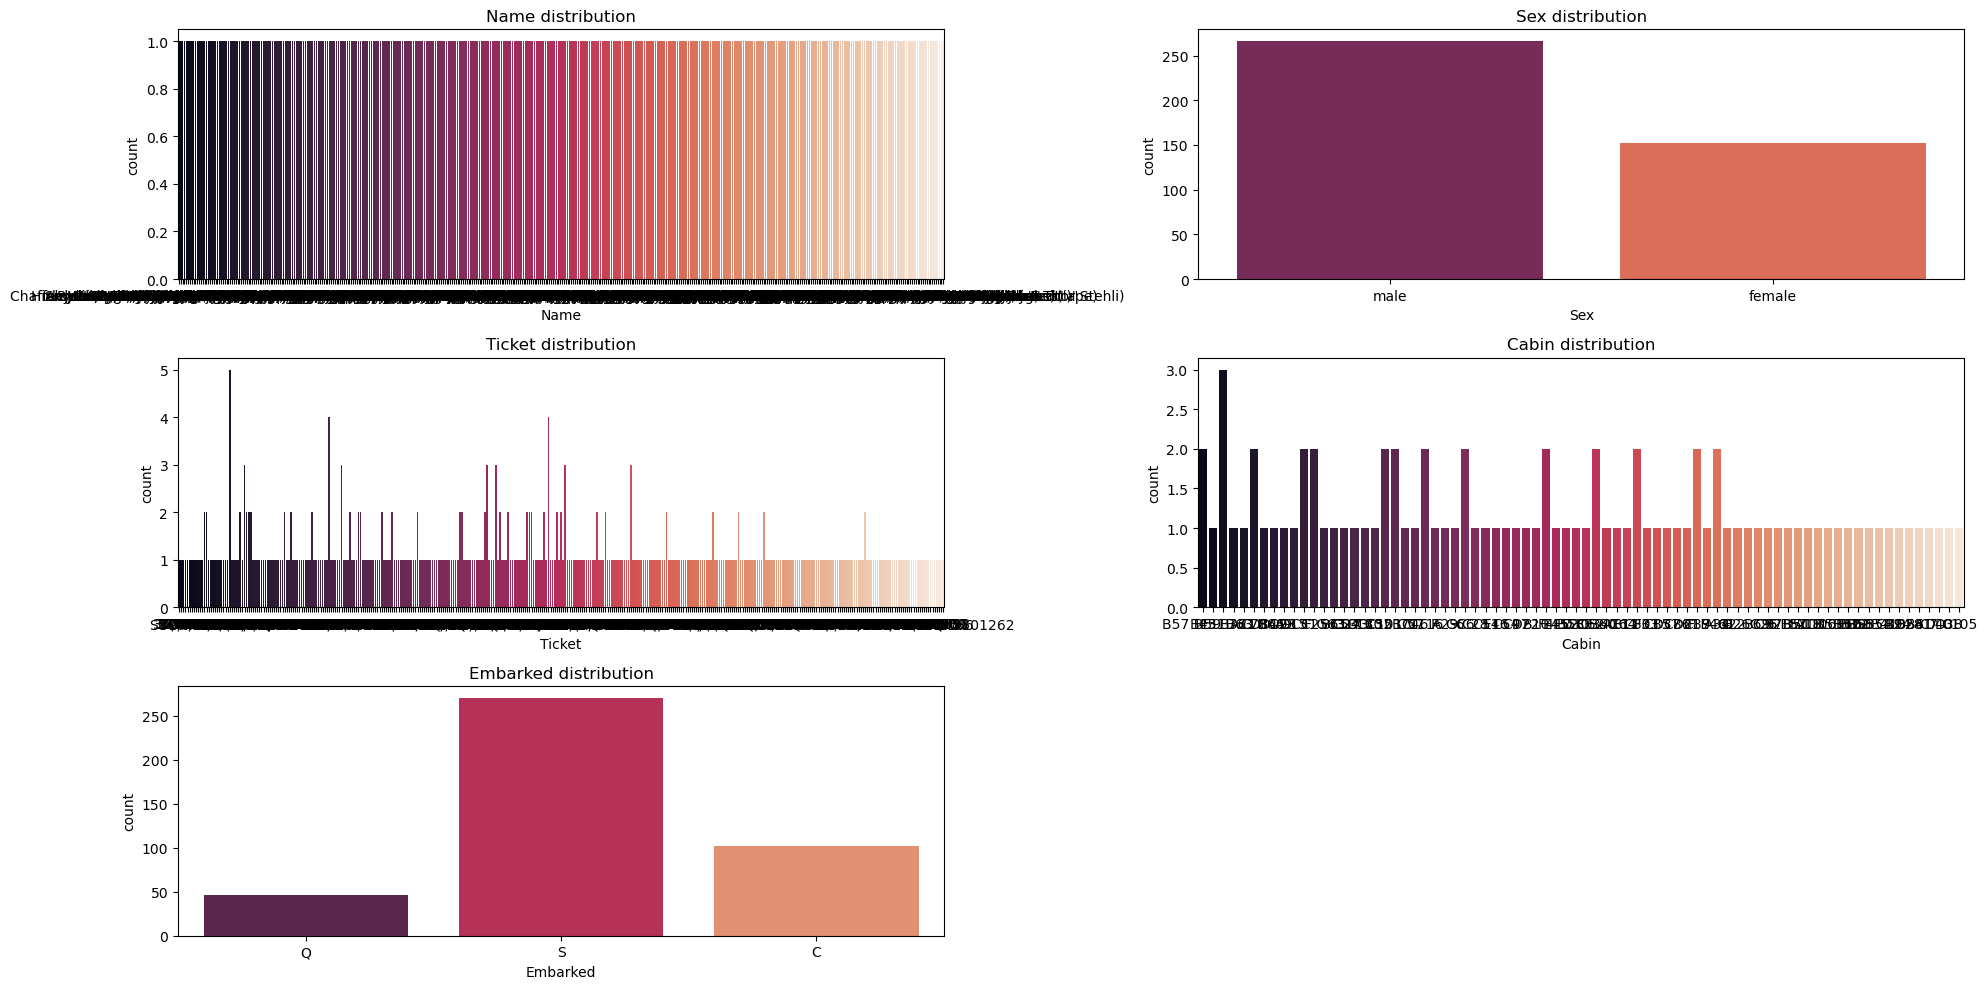

In [23]:
plot_features(df,1)

## some knowledge extracted

#1-some columns must be dropped (not important) as name,ticket
#2-the female gender where more then male
#3-embark (S) is most frequent


## plot numeric_features

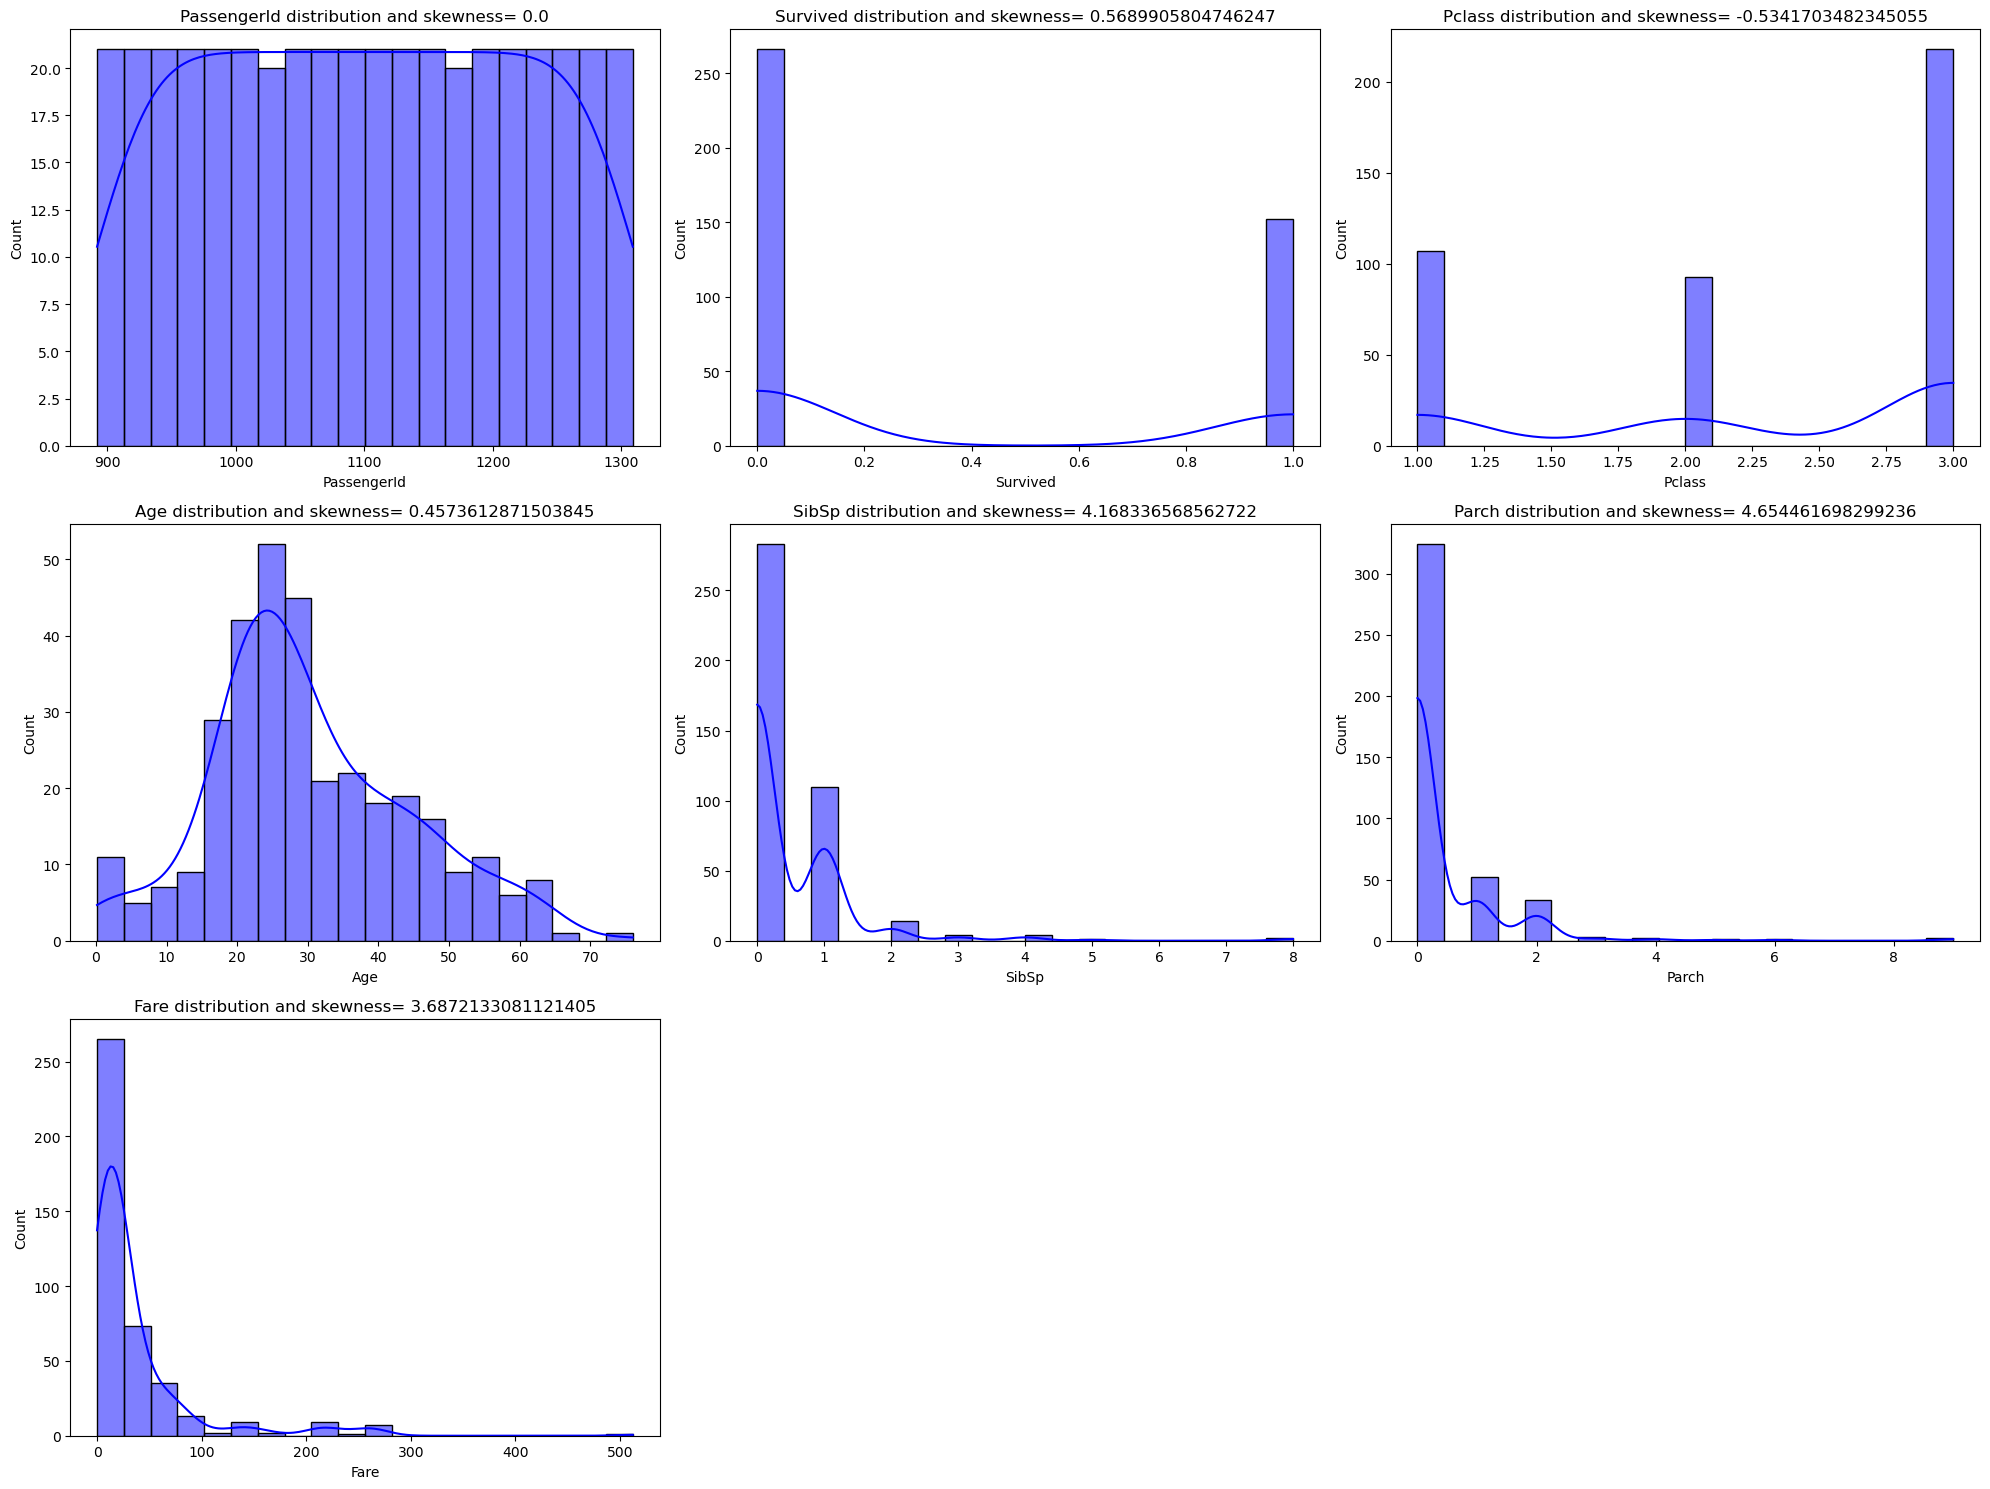

In [24]:
plot_features(df,2)

## some knowledge extracted

#1-some columns must be dropped (not important) as passengerid
#2-fare column has some outliers and skewness (right-skewed)
#3-age column is near to normaly distributed
#4-remaining columns must be converted to categorical because of num of unique values 

## plot features with target

In [27]:
def plot_features_with_target(data,target,flag):
    """
    This function plots features with Target Column.\n
    If flag=1 then plot categorical features with Target Column\n
    if flag=2 then plot numerical features with Target Column\n
    """
    # for categorical features
    if flag==1:
        cat_cols=data.select_dtypes(include=["category","object"]).columns
        plt.figure(figsize=(20,10))
        total_cols=2
        total_rows=math.ceil(len(cat_cols)/total_cols)
        idx=1

        for col in cat_cols:
            plt.subplot(total_rows,total_cols,idx)
            sns.countplot(x=col,data=data,palette="rocket",hue=target)
            plt.title(f"{col} distribution")
            idx+=1
        plt.tight_layout()
        plt.show()

    # for numerical features
    elif flag==2:
        num_cols=data.select_dtypes(include=["number"]).columns
        total_cols=3
        total_rows=math.ceil(len(num_cols)/total_cols)
        plt.figure(figsize=(20,5*total_rows))
        idx=1

        for col in num_cols:
            plt.subplot(total_rows,total_cols,idx)
            sns.barplot(y = data[col], x = data[target], palette = "rocket")
            plt.title(f"{col} distribution")
            idx+=1
        plt.tight_layout()
        plt.show()


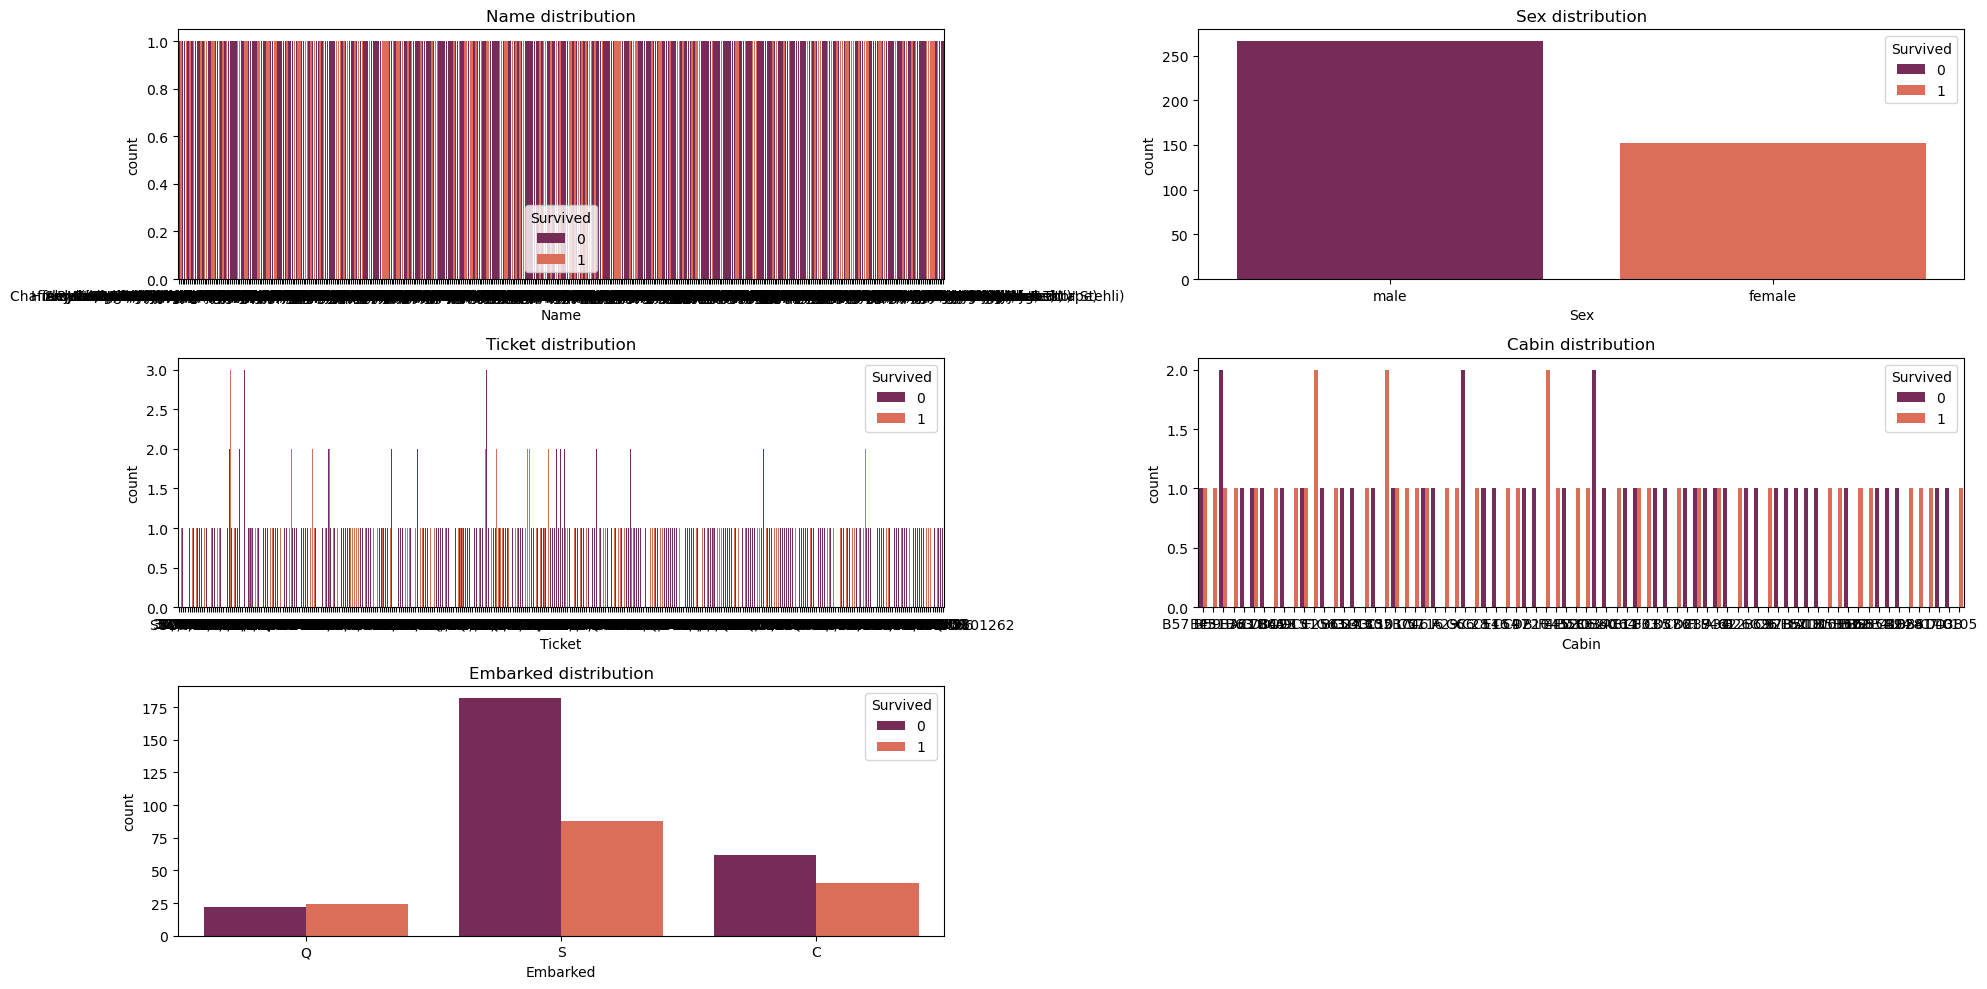

In [28]:
target="Survived"
plot_features_with_target(df,target,1)

1-here we can see that most of male not servived.
2-people who was S embarke has the highest percent that not servived 

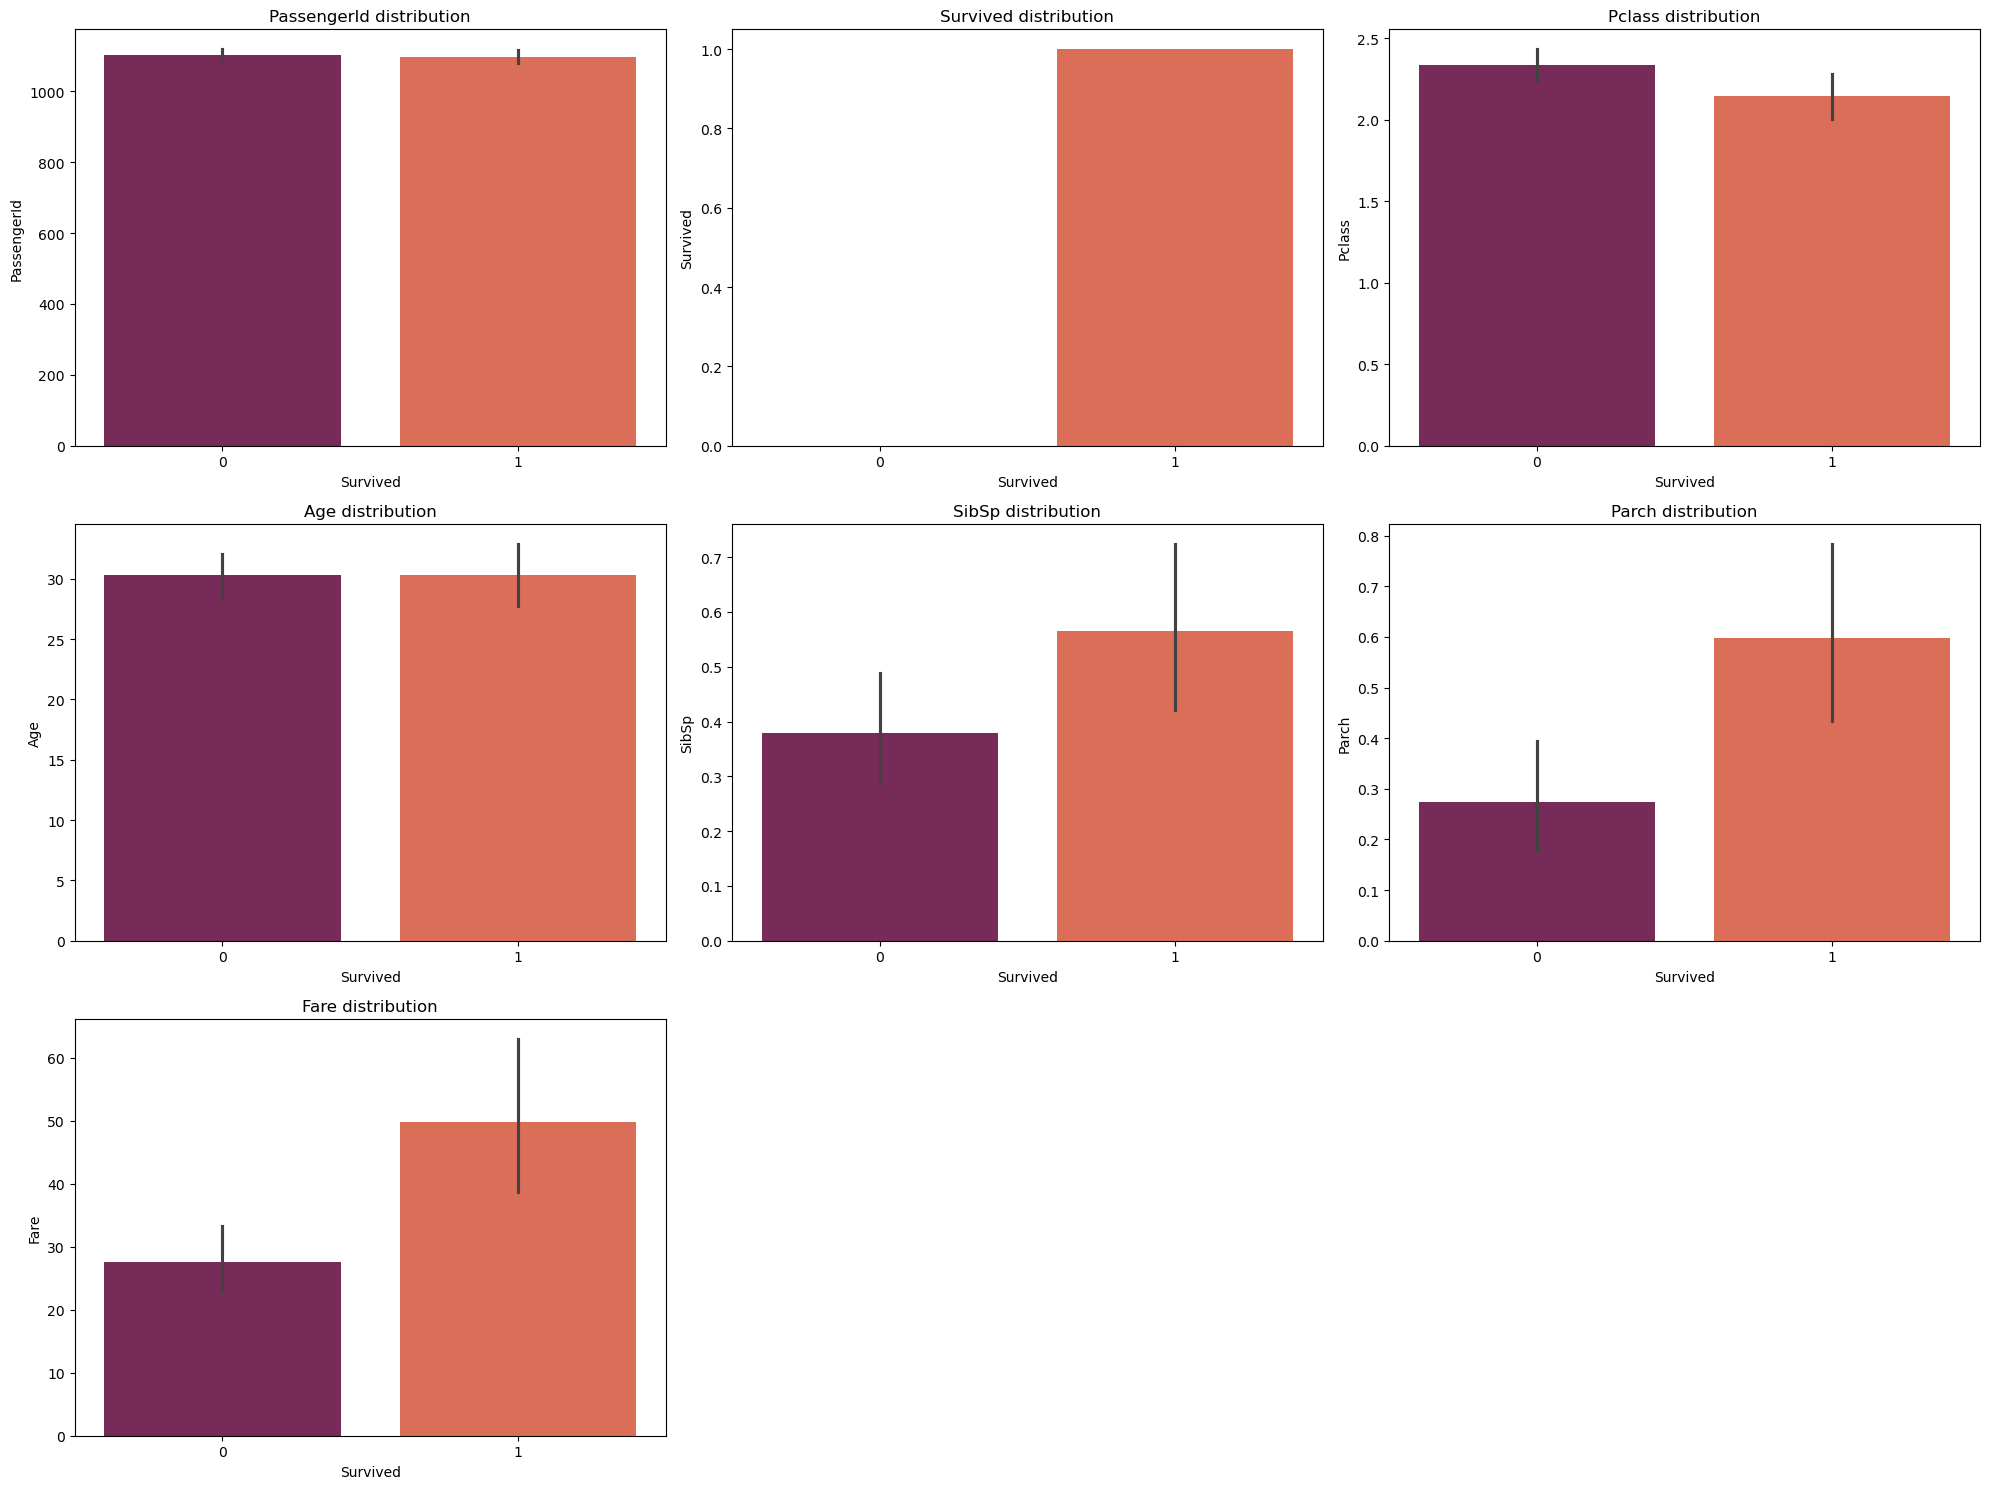

In [29]:
plot_features_with_target(df,target,2)

people who paid more has the highest percent to servive 